## Taller N° 2
- **Nombre:** Luis Alexander Lema Delgado  
- **Materia**: Metodos Numericos
- **Fecha**: 28 de Octubre de 2025
- **Profesor**: JONATHAN ALEJANDRO ZEA GUACHAMIN
- **github**: [https://github.com/LuisALema/Metodos_Numericos_2025B/blob/main/Talleres/Taller2.ipynb]


### Problema 1

$ x^4 + 540x^3 + 109124x^2 + 9781632x + 328188672 = 0 $


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import newton

Convergencia en la iteración 27


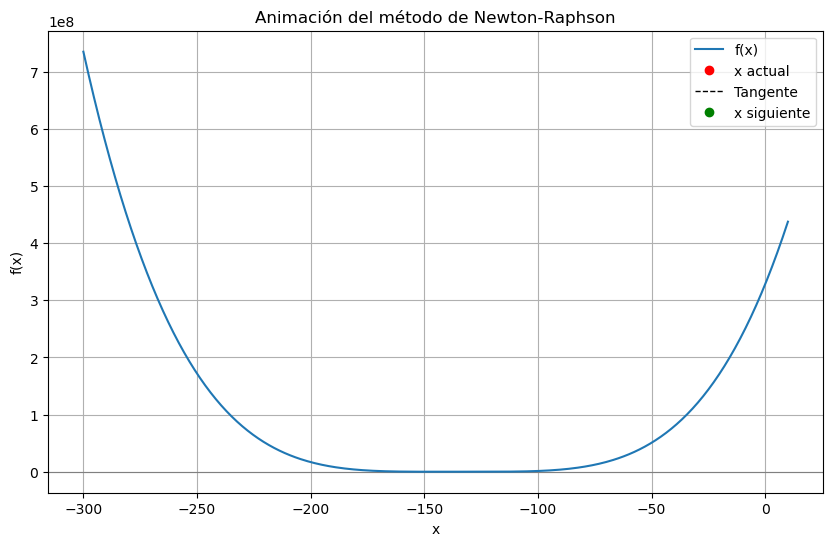

In [7]:

# --- Definición de la función y su derivada ---
def funcion(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def derivada(x):
    return 4*x**3 + 1620*x**2 + 218248*x + 9781632


# --- Método de Newton-Raphson manual ---
def newton_raphson(f, df, x_inicial, tolerancia=1e-6, iter_max=100):
    pasos = [x_inicial]
    x = x_inicial
    for i in range(iter_max):
        fx = f(x)
        dfx = df(x)

        if abs(fx) < tolerancia:
            print(f"Convergencia en la iteración {i+1}")
            break

        if dfx == 0:
            print("La derivada es cero, el método no puede continuar.")
            break

        x = x - fx / dfx
        pasos.append(x)

    if i == iter_max - 1:
        print("El método no alcanzó la convergencia dentro del límite de iteraciones.")

    return pasos


# --- Parámetros iniciales ---
x_inicial = 0.75
iteraciones = newton_raphson(funcion, derivada, x_inicial)

# --- Rango para graficar ---
valores_x = np.linspace(-300, 10, 400)
valores_y = funcion(valores_x)

# --- Configuración de la figura ---
fig, eje = plt.subplots(figsize=(10, 6))
eje.set_title("Animación del método de Newton-Raphson")
eje.set_xlabel("x")
eje.set_ylabel("f(x)")
eje.grid(True)
eje.axhline(0, color='gray', lw=0.8)

# --- Gráfica principal ---
grafica_func, = eje.plot(valores_x, valores_y, label="f(x)")
punto, = eje.plot([], [], 'ro', label="x actual")
tangente, = eje.plot([], [], 'k--', lw=1, label="Tangente")
prox_punto, = eje.plot([], [], 'go', label="x siguiente")

eje.legend()

def iniciar():
    punto.set_data([], [])
    tangente.set_data([], [])
    prox_punto.set_data([], [])
    return punto, tangente, prox_punto

def actualizar(frame):
    x_k = iteraciones[frame]
    y_k = funcion(x_k)
    deriv_k = derivada(x_k)

    punto.set_data([x_k], [y_k])

    if frame + 1 < len(iteraciones):
        x_sig = iteraciones[frame + 1]
        x_tan = [x_k, x_sig]
        y_tan = [y_k, 0]
        prox_punto.set_data([x_sig], [0])
    else:
        x_tan = np.linspace(x_k - 10, x_k + 10, 2)
        y_tan = y_k + deriv_k * (x_tan - x_k)
        prox_punto.set_data([], [])

    tangente.set_data(x_tan, y_tan)
    eje.set_title(f"Iteración {frame}: x_{frame} = {x_k:.6f}")
    return punto, tangente, prox_punto

# --- Animación ---
ani = animation.FuncAnimation(fig, actualizar, frames=len(iteraciones),
                              init_func=iniciar, blit=True, interval=600, repeat=True)

plt.show()


### Problema 2
Encuentre todos los puntos en los que la curva $(y^2)^2 = (x + \frac{3}{2})^2 - 1$ interseca la recta $y = -2$.


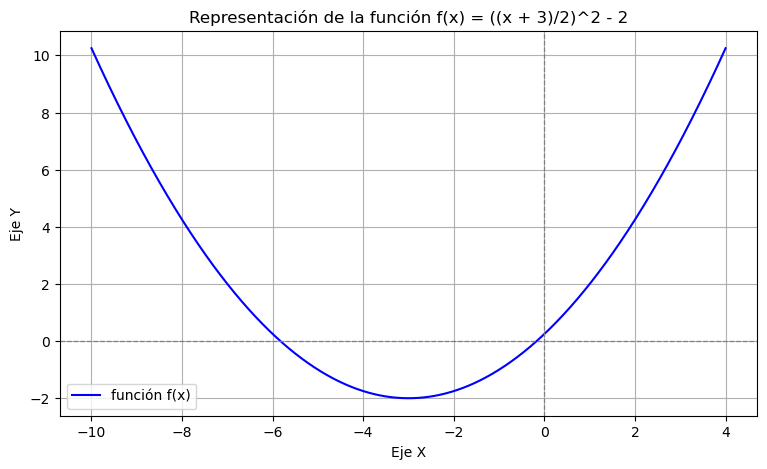

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# --- Definición de la función ---
def funcion(x):
    # f(x) = ((x + 3)/2)^2 - 2
    return ((x + 3) / 2)**2 - 2

# --- Valores para graficar ---
valores_x = np.linspace(-10, 4, 800)
valores_y = funcion(valores_x)

# --- Configuración del gráfico ---
plt.figure(figsize=(9, 5))
plt.plot(valores_x, valores_y, color='b', label='función f(x)')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.9)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.9)

# --- Etiquetas y título ---
plt.title("Representación de la función f(x) = ((x + 3)/2)^2 - 2")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.legend()
plt.grid(True)

# --- Mostrar resultado ---
plt.show()


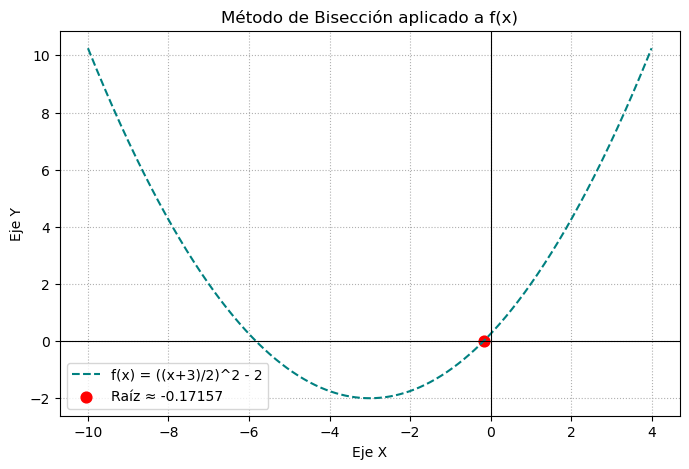

La raíz aproximada es: x = -0.17157


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# --- Definición de la función ---
def funcion(x):
    # f(x) = ((x + 3)/2)^2 - 2
    return ((x + 3) / 2)**2 - 2

# --- Implementación del método de bisección ---
def metodo_biseccion(func, a, b, tolerancia=1e-5, max_iter=1000):
    # Verificar si se cumple la condición de signos opuestos
    if func(a) * func(b) >= 0:
        print("No se puede aplicar bisección: f(a) y f(b) deben tener signos distintos.")
        return None

    contador = 0
    while (b - a) / 2 > tolerancia:
        medio = (a + b) / 2

        # Si justo en el medio hay una raíz
        if func(medio) == 0:
            return medio

        # Se elige el subintervalo que contiene la raíz
        if func(a) * func(medio) < 0:
            b = medio
        else:
            a = medio

        contador += 1
        if contador >= max_iter:
            print("Se alcanzó el número máximo de iteraciones sin convergencia.")
            return None

    return (a + b) / 2


# --- Datos para graficar ---
valores_x = np.linspace(-10, 4, 800)
valores_y = funcion(valores_x)

# --- Gráfico de la función ---
plt.figure(figsize=(8, 5))
plt.plot(valores_x, valores_y, color='teal', linestyle='--', label='f(x) = ((x+3)/2)^2 - 2')

# --- Intervalo inicial ---
inicio = -4
fin = 2

# --- Llamada al método de bisección ---
raiz = metodo_biseccion(funcion, inicio, fin)

# --- Mostrar la raíz si se encontró ---
if raiz is not None:
    plt.scatter(raiz, funcion(raiz), color='red', s=60, label=f"Raíz ≈ {raiz:.5f}")

# --- Personalización del gráfico ---
plt.title("Método de Bisección aplicado a f(x)")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.axhline(0, color='black', lw=0.8)
plt.axvline(0, color='black', lw=0.8)
plt.grid(True, linestyle=':')
plt.legend()

# --- Mostrar todo ---
plt.show()

# --- Mostrar el resultado por consola ---
if raiz is not None:
    print(f"La raíz aproximada es: x = {raiz:.5f}")


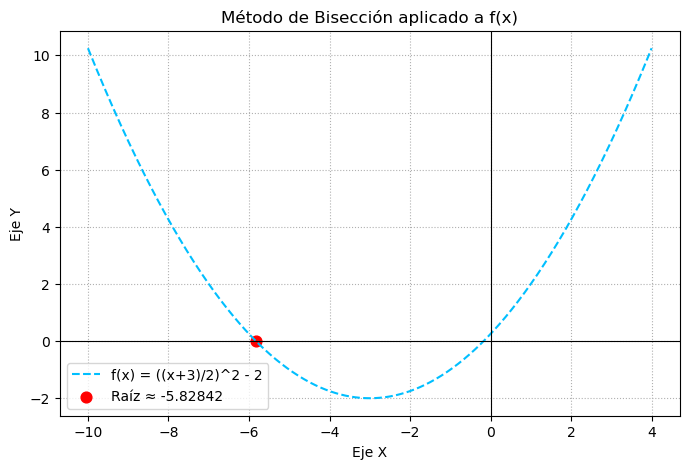

La raíz encontrada es aproximadamente: x = -5.82842


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# --- Definición de la función ---
def funcion(x):
    # Ecuación: ((x + 3)/2)^2 - 2
    return ((x + 3) / 2)**2 - 2

# --- Método de bisección ---
def metodo_biseccion(func, inicio, fin, tolerancia=1e-5, max_iter=1000):
    # Comprobar que hay cambio de signo entre los extremos
    if func(inicio) * func(fin) >= 0:
        print("No se puede aplicar bisección: f(a) y f(b) no tienen signos opuestos.")
        return None
    
    contador = 0
    while (fin - inicio) / 2 > tolerancia:
        medio = (inicio + fin) / 2

        if func(medio) == 0:
            return medio
        elif func(inicio) * func(medio) < 0:
            fin = medio
        else:
            inicio = medio

        contador += 1
        if contador >= max_iter:
            print("Se alcanzó el número máximo de iteraciones.")
            return None
    
    return (inicio + fin) / 2


# --- Datos para graficar ---
x_vals = np.linspace(-10, 4, 800)
y_vals = funcion(x_vals)

# --- Gráfico de la función ---
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, color='deepskyblue', linestyle='--', label='f(x) = ((x+3)/2)^2 - 2')

# Intervalo de búsqueda
a = -8
b = -4

# --- Aplicar el método ---
raiz = metodo_biseccion(funcion, a, b)

# --- Si hay raíz, marcarla en la gráfica ---
if raiz is not None:
    plt.scatter(raiz, funcion(raiz), color='red', s=60, label=f"Raíz ≈ {raiz:.5f}")

# --- Personalización del gráfico ---
plt.title("Método de Bisección aplicado a f(x)")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.axhline(0, color='black', lw=0.8)
plt.axvline(0, color='black', lw=0.8)
plt.grid(True, linestyle=':')
plt.legend()

plt.show()

# --- Resultado en consola ---
if raiz is not None:
    print(f"La raíz encontrada es aproximadamente: x = {raiz:.5f}")


## Problema 3
Dada la función $f(x) = \frac{\sin(x)}{x}$. ¿A partir de qué valor $x_T$ se cumple que $f(x) < 0.015$ para todo $x \ge x_T$?

C:\Users\luisl\AppData\Local\Temp\ipykernel_16388\1539959845.py:7: RuntimeWarning: invalid value encountered in divide
  return np.where(x != 0, np.sin(x) / x, 1)


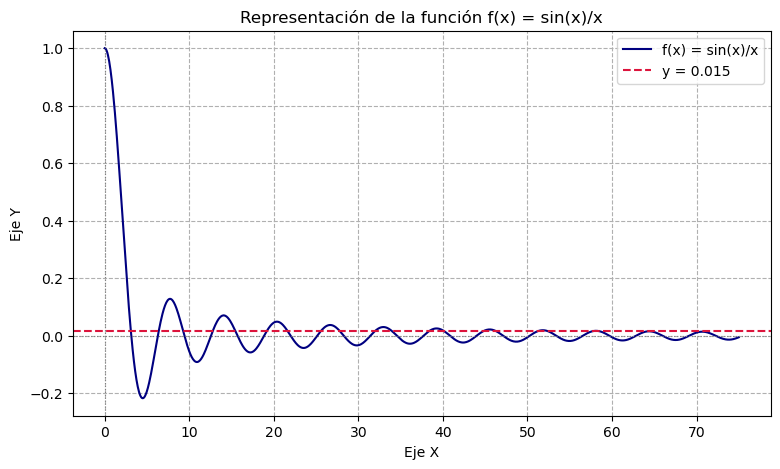

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# --- Definición de la función ---
def funcion(x):
    # f(x) = sin(x)/x, definiendo f(0) = 1
    return np.where(x != 0, np.sin(x) / x, 1)

# --- Rango de valores para graficar ---
valores_x = np.linspace(0, 75, 1000)
valores_y = funcion(valores_x)

# --- Configuración de la gráfica ---
plt.figure(figsize=(9, 5))
plt.plot(valores_x, valores_y, color='navy', label='f(x) = sin(x)/x')
plt.axhline(y=0.015, color='crimson', linestyle='--', label='y = 0.015')
plt.axhline(y=0, color='gray', linestyle=':', linewidth=0.8)  # Eje X
plt.axvline(x=0, color='gray', linestyle=':', linewidth=0.8)  # Eje Y

# --- Personalización del gráfico ---
plt.title("Representación de la función f(x) = sin(x)/x")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.legend()
plt.grid(True, linestyle='--')

# --- Mostrar ---
plt.show()


In [12]:
import numpy as np

# --- Definición de la función ---
def funcion(x):
    # f(x) = sin(x)/x, con f(0) = 1
    if x == 0:
        return 1
    else:
        return np.sin(x) / x

# --- Parámetros de búsqueda ---
limite = 0.015     # umbral dado
paso = 0.01        # tamaño de incremento
x_actual = 1.0     # empezamos desde 1 para evitar dividir por cero

# --- Búsqueda del valor x_T ---
while True:
    # Evaluamos f(x) en un pequeño rango de valores
    muestras = [abs(funcion(x_actual + i * paso)) for i in range(1000)]
    
    # Si todos los valores están bajo el límite, ya encontramos x_T
    if all(valor < limite for valor in muestras):
        x_T = x_actual
        break
    
    x_actual += paso

# --- Mostrar resultado ---
print(f"El valor aproximado de x_T es: {x_T:.4f}")


El valor aproximado de x_T es: 64.6500
